In [2]:
from matplotlib import pyplot as plt
import cv2 
import numpy as np
import argparse
import imutils

Stitched image with black border:


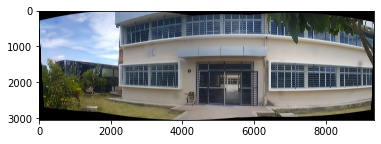

Stitched image without the black border:


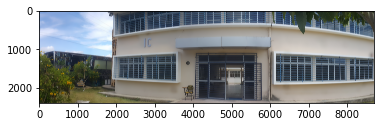

In [4]:
#reading images
ic1 = cv2.imread("./ic1.jpg")
ic2 = cv2.imread("./ic2.jpg")
ic3 = cv2.imread("./ic3.jpg")
ic4 = cv2.imread("./ic4.jpg")

#converting to rgb
ic1 = cv2.cvtColor(ic1, cv2.COLOR_BGR2RGB)
ic2 = cv2.cvtColor(ic2, cv2.COLOR_BGR2RGB)
ic3 = cv2.cvtColor(ic3, cv2.COLOR_BGR2RGB)
ic4 = cv2.cvtColor(ic4, cv2.COLOR_BGR2RGB)

#stitching the images
images = [ic1, ic2, ic3, ic4]
stitcher = cv2.Stitcher_create()
(status, output) = stitcher.stitch(images)
if status == 0:
  print('Stitched image with black border:')
  plt.imshow(output)
  plt.show()
else:
  print('Erro')
  exit()

#cropping the black area
#creating a border around the image
stitched_img = cv2.copyMakeBorder(output, 10, 10, 10, 10, cv2.BORDER_CONSTANT, (0, 0, 0))
#converting the image to grayscale
gray_stiched_img = cv2.cvtColor(stitched_img, cv2.COLOR_BGR2GRAY)
#thresholding the image 
thresh = cv2.threshold(gray_stiched_img, 0, 255, cv2.THRESH_BINARY)[1]

#getting the contour of the image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
#calculating the bounding box of the largest contour
c = max(cnts, key=cv2.contourArea)
#creating a rectangle mask using the size of the largest contour 
mask = np.zeros(thresh.shape, dtype="uint8")
(x, y, w, h) = cv2.boundingRect(c)
cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

#creating two copies of mask to erode the image and subtract to get the minimum rectangular mask
minRect = mask.copy()
sub = mask.copy()
#keep looping until there are no non-zero pixels left in the subtracted image
while cv2.countNonZero(sub) > 60:
  #erode to get the minimum rectangular mask
  minRect = cv2.erode(minRect, None)
  #counting if there are any non-zero pixels left
  sub = cv2.subtract(minRect, thresh)

#now that we got the minimum rectangular mask just need to get the boundaries
#x_min, x_max, y_min, y_max
cnts = cv2.findContours(minRect.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
(x, y, w, h) = cv2.boundingRect(c)
#using the bounding box coordinates to extract the final stitched image
stitched_img = stitched_img[y:y + h, x:x + w]
print('Stitched image without the black border:')
plt.imshow(stitched_img)
plt.show()